In [1]:
%load_ext autoreload
# to make modification in .py file type %autoreload

%load_ext line_profiler
#for finding out how long code takes to run
#an example of how to get diagnostics on functions
#%lprun -f ff.generate_map_full ff.generate_map_full(384, A_BB, alpha_BB, beta_sigma, freqs, nu0)

In [174]:
#trying to consolidate the work so far into a cohesive document and notation. Pushing definitions into 
#separate .py file

#------packages-------------------
%pylab inline
import time
import healpy as hp
import matplotlib.pyplot as plt
import foreground_functions as ff
import scipy.special as sp #for the zeta function sp.zeta() in the 0x2 term


#-------BB parameters (to start)--------
A_BB = 1.7e3
alpha_BB = -3.0
beta_BB = -3.2
# beta_sigma = 1.5e-6

A_beta = 1e-6
gamma_BB = -2.1 #needs to be less than -2 for the 0x2 term to converge
nu0 = 95e9

nside=128

crit = 2/np.log(10)
sigma_default = crit/3

# #-------map paramters--------------------
# nside = 128
# Lmax = 3*nside
# ells = np.arange(0,Lmax)

#define list of frequencies going from 10 to 300 GHz, sampling 20 points
freqs = np.linspace(30,300,4)*1.e9
ells = np.arange(384)

filepath = '/Users/alex/Documents/foreground_figures/'
#file path to put figures in

Populating the interactive namespace from numpy and matplotlib


In [48]:
small_scale_cls = ff.powerlaw(ells, A_BB, alpha_BB)
large_scale_cls = ff.powerlaw(ells, A_BB, 2*alpha_BB)
very_small_cls = ff.powerlaw(ells, A_BB, alpha_BB/2)

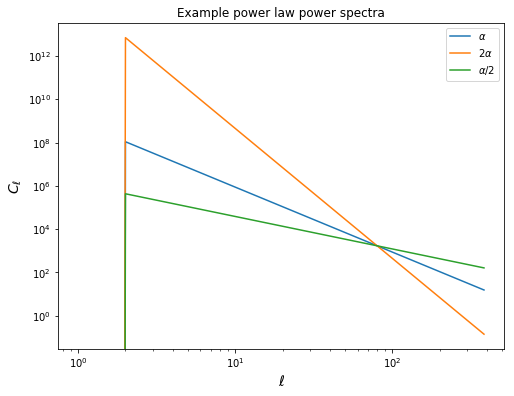

In [175]:
figure(figsize=(8,6))
loglog(ells, small_scale_cls, label=r'$\alpha$')
loglog(ells, large_scale_cls, label=r'$2\alpha$')
loglog(ells, very_small_cls, label=r'$\alpha$/2')
xlabel('$\ell$', fontsize=14)
ylabel('$C_\ell$', fontsize=14)
title('Example power law power spectra')
legend()
savefig(filepath + 'example PS.png')#, transparent=True)

In [50]:
very_small_map =  hp.synfast(very_small_cls, nside, new=True, verbose=False)

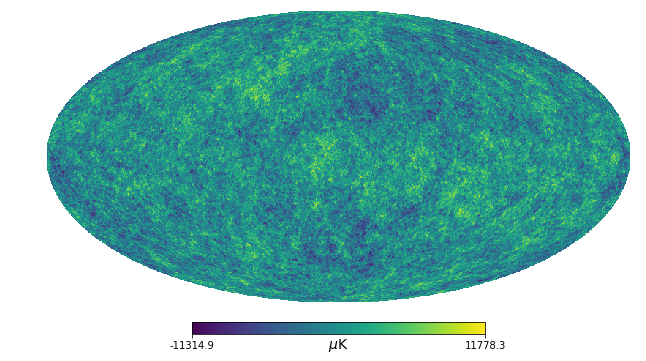

In [192]:
hp.mollview(very_small_map, unit=r'$\mu \rm K$',  title='')
savefig(filepath + 'map fine', transparent=True)

In [52]:
small_map = hp.synfast(small_scale_cls, nside, new=True, verbose=False)

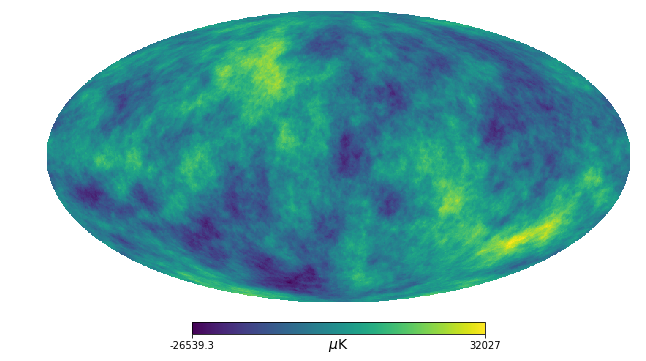

In [190]:
hp.mollview(small_map, unit=r'$\mu \rm K$', title='')
savefig(filepath + 'map normal', transparent=True)

In [54]:
big_map = hp.synfast(large_scale_cls, nside, new=True, verbose=False)

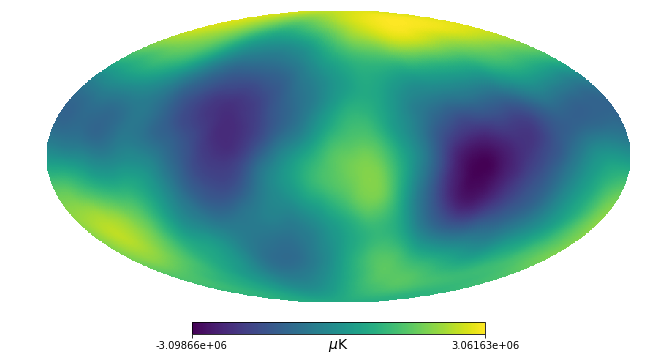

In [189]:
hp.mollview(big_map, unit=r'$\mu \rm K$', title='')
savefig(filepath + 'map coarse', transparent=True)

# try plotting spherical harmonics
want to plot 
$$
Y_{00}, Y_{-11}, Y_{01}, Y_{11}, Y_{4m}
$$

In [101]:
big_alms = hp.map2alm(big_map)

In [102]:
big_alms.shape

(73920,)

In [162]:
alm = np.zeros_like(big_alms, dtype=complex)
alm[12] = 1

In [156]:
print(alm)
type(alm)

[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]


numpy.ndarray

In [163]:
map1 = hp.alm2map(alm, 128)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


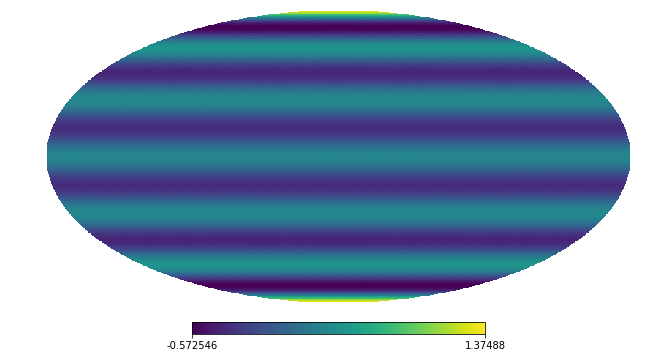

In [195]:
hp.mollview(map1, title='')

In [196]:
temp_cls = hp.anafast(big_map)

In [352]:
cls = np.zeros_like(temp_cls)
cls[1] = 1

In [393]:
map2 = hp.synfast(cls, nside, new=True, verbose=False)

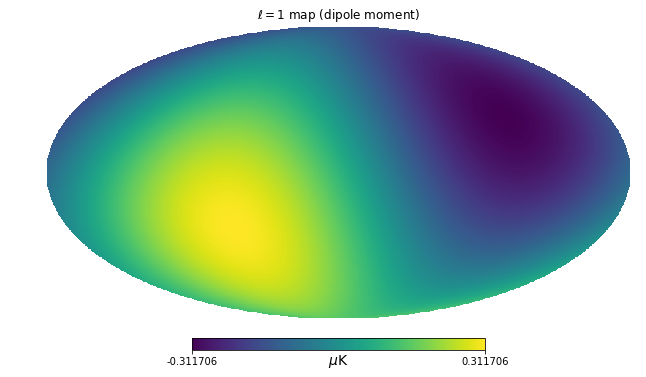

In [394]:
hp.mollview(map2, unit=r'$\mu \rm K$', title=r'$\ell=1$ map (dipole moment)')
savefig(filepath + 'dipole map')

In [405]:
cls = np.zeros_like(temp_cls)
cls[4] = 1

In [406]:
map2 = hp.synfast(cls, nside, new=True, verbose=False)

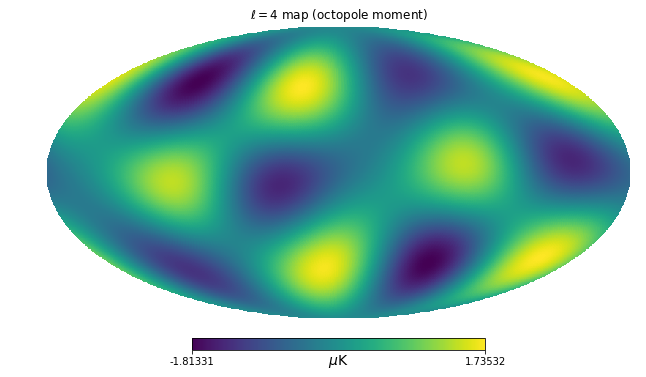

In [409]:
hp.mollview(map2, unit=r'$\mu \rm K$', title=r'$\ell=4$ map (octopole moment)')
savefig(filepath + 'ell 4 map')

In [259]:
x = np.linspace(1,400,400)
y1 = 1/np.log(30/x)
y2 = -y1
z1 = 1/np.log(300/x)
z2 = -z1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


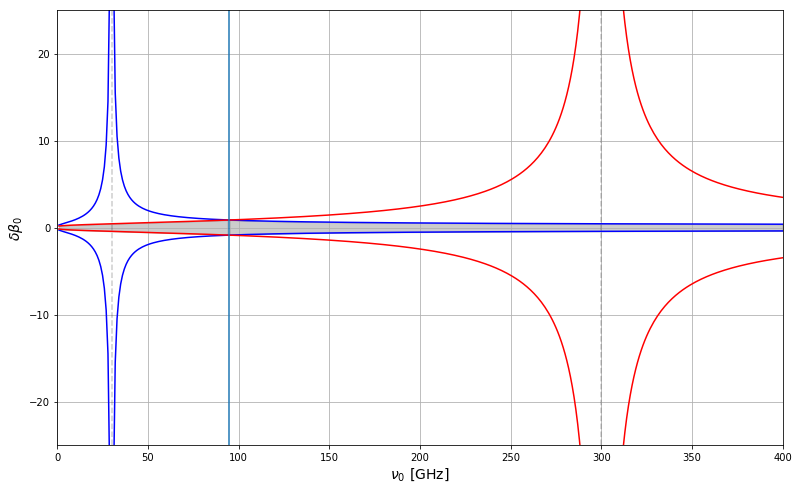

In [303]:
figure(figsize(13,8))
plot(x, y1, 'b')
plot(x, y2, 'b')
plot(x, z1, 'r')
plot(x, z2, 'r')
xlim(0,400)
ylim(-25,25)
fill_between(x, y1, y2, where= x>94, alpha=0.2, color='k')
fill_between(x, z1, z2, where= x<95, alpha=0.2, color='k')
xlabel(r'$\nu_0 \rm \ [GHz]$', fontsize=14)
axvline(x=30, ls='--', color='k', alpha=0.2)
axvline(x=300, ls='--', color='k',alpha=0.2)
ylabel(r'$\delta \beta_0$', fontsize=14)
axvline(x=95)
grid()

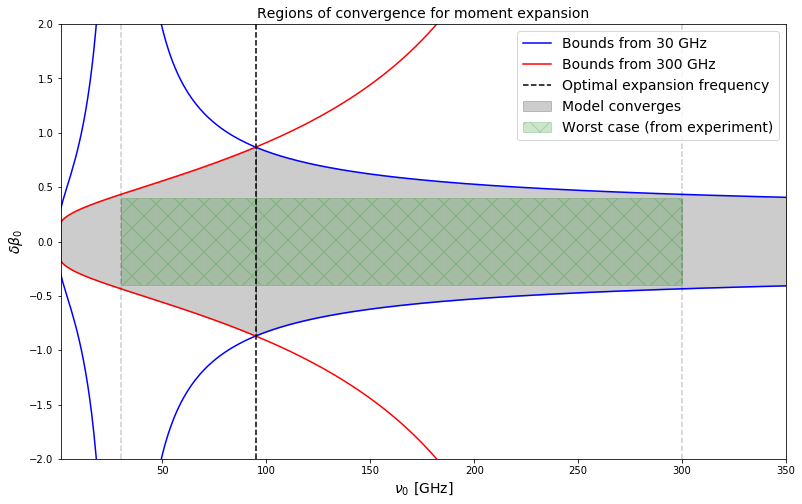

In [348]:
y4 = np.zeros_like(x)
y4[29:300] = 1
y5 = np.ones_like(x)*0.4
figure(figsize(13,8))
plot(x, y1, 'b', label='Bounds from 30 GHz')
plot(x, y2, 'b')
plot(x, z1, 'r', label='Bounds from 300 GHz')
plot(x, z2, 'r')
# plot(x, y5, color='g')
# plot(x, -y5, color='g')
xlim(1,350)
ylim(-2,2)
fill_between(x, y1, y2, where= x>94, alpha=0.2, color='k')
fill_between(x, z1, z2, where= x<96, alpha=0.2, color='k', label='Model converges')
fill_between(x, y5, -y5, where=y4>0, color='g', alpha=0.2, hatch='X', label='Worst case (from experiment)')
xlabel(r'$\nu_0 \rm \ [GHz]$', fontsize=14)
ylabel(r'$\delta \beta_0$', fontsize=14)
axvline(x=30, ls='--', color='k', alpha=0.2)
axvline(x=300, ls='--', color='k',alpha=0.2)
axvline(x=95, ls='--', color='k', label='Optimal expansion frequency')
legend(loc='upper right', fontsize=14)
title('Regions of convergence for moment expansion', fontsize=14);
savefig(filepath + 'convergence_regions')